In [1]:
#imports
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (recall_score,
                            precision_score,
                            accuracy_score,
                            roc_curve,
                            roc_auc_score)

from sklearn.ensemble import RandomForestClassifier               
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
#read csv
stroke_df = pd.read_csv('dataset/train.csv')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [3]:
#converting categorical data into numbers

cat_df = stroke_df[['gender', 'ever_married','work_type', 'Residence_type','smoking_status']]
cat_df = cat_df.astype('category')
cat_df = cat_df.apply(lambda x : x.cat.codes)
cat_df.head()

#print(cat_df['smoking_status'].unique())
stroke_df[cat_df.columns] = cat_df.copy()

#stroke_df.head()

In [4]:
def categorizar_glicose(value):
  if value < 100:
    return 1
  elif 100 <= value < 125:
    return 2
  else:
    return 3

def categorizar_bmi(value):
  if value <= 18.5:
    return 1
  elif 18.5 < value <= 24.9:
    return 2
  elif 24.9 < value <= 29.9:
    return 3
  elif 29.9 < value <= 34.9:
    return 4
  elif 34.9 < value <= 39.9:
    return 5
  else:
    return 6

def categorizar_idade(value):
  if value <= 18:
    return 1
  elif 18 < value <= 30:
    return 2
  elif 30 < value <= 60:
    return 3
  else:
    return 4

stroke_df['avg_glucose_level'] = stroke_df['avg_glucose_level'].apply(categorizar_glicose)
stroke_df['bmi'] = stroke_df['bmi'].apply(categorizar_bmi)
stroke_df['age'] = stroke_df['age'].apply(categorizar_idade)

In [5]:
X = stroke_df.drop(['id', 'stroke'], axis=1)
y = stroke_df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, stratify=y)

pipelines = {
    'Decision Tree': Pipeline([
        ('classifier', DecisionTreeClassifier())
    ]),
    'Random Forest': Pipeline([
        ('classifier', RandomForestClassifier())
    ]),
    'MLP Classifier': Pipeline([
        ('classifier', MLPClassifier())
    ]),
    'KNN': Pipeline([
        ('classifier', KNeighborsClassifier())
    ]),
}

param_grids = {
    'Decision Tree':{
        'classifier__min_samples_split': [2,5,10],
        'classifier__max_depth': [None, 5, 10, 15],
        'classifier__criterion': ['gini', 'entropy']
    },
    'Random Forest':{
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__n_estimators': [50,100,150],
        'classifier__max_depth': [None, 5, 10, 15],
        'classifier__criterion': ['gini', 'entropy']
    },
    'MLP Classifier':{
        'classifier__hidden_layer_sizes': [(50,), (100,50), (100,100,50)],
        'classifier__activation': ['identity', 'logistic', 'tanh', 'relu'],
        'classifier__alpha': [0.0001, 0.001, 0.01],
    },
    'KNN':{
        'classifier__n_neighbors': [3,5,7,9],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    }
}

for model_name, pipeline in pipelines.items():
  grid_search = GridSearchCV(pipeline, param_grids[model_name], scoring='recall')
  grid_search.fit(X_train, y_train)

  best_params = grid_search.best_params_
  best_model = grid_search.best_estimator_

  y_pred = best_model.predict(X_test)
  recall = recall_score(y_test, y_pred)

  print("Modelo:", model_name)
  print("Melhores Parâmetros:", best_params)
  print("Recall:", recall)

Modelo: Decision Tree
Melhores Parâmetros: {'classifier__criterion': 'entropy', 'classifier__max_depth': None, 'classifier__min_samples_split': 2}
Recall: 0.07142857142857142
Modelo: Random Forest
Melhores Parâmetros: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Recall: 0.047619047619047616


c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Vagner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the 

Modelo: MLP Classifier
Melhores Parâmetros: {'classifier__activation': 'relu', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (100, 100, 50)}
Recall: 0.031746031746031744
Modelo: KNN
Melhores Parâmetros: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
Recall: 0.047619047619047616


In [145]:
#decision tree

X = stroke_df.drop(['id', 'stroke'], axis=1)
y = stroke_df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, stratify=y)

ad = DecisionTreeClassifier()
ad.fit(X_train, y_train)
y_pred_ad = ad.predict(X_test)

In [146]:
#metrics

precision = precision_score(y_test, y_pred_ad)
recall = recall_score(y_test, y_pred_ad)
accuracy = accuracy_score(y_test, y_pred_ad)

print("Precisão:", precision)
print("Recall:", recall)
print("Acurácia:", accuracy)

Precisão: 0.17857142857142858
Recall: 0.07936507936507936
Acurácia: 0.9470761189153871


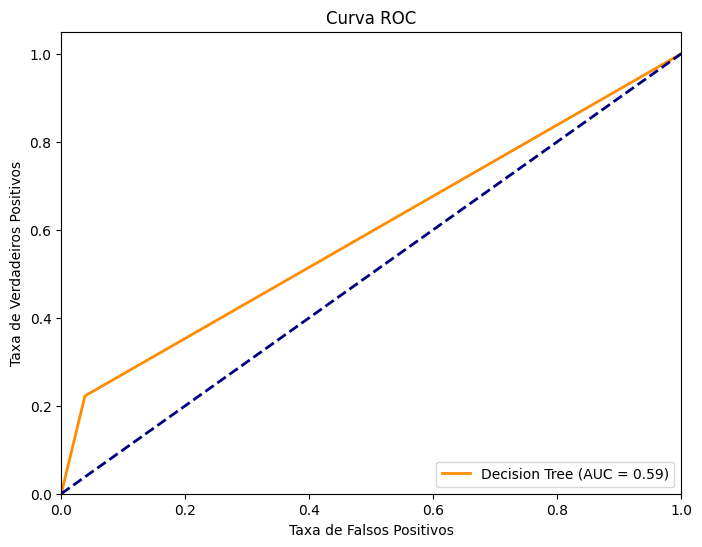

In [67]:
#curva ROC - avaliação dos classificadores

#decision tree
y_prob = ad.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob) #Área Sob a Curva ROC (AUC-ROC)

# Plote a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()